# **1. Introduction**
In machine learning, imbalanced data refers to a situation where one class (or category) in the dataset has significantly more samples than another. They are those datasets where there is severe skewness in the class distributition.<br> 

**For example**, in a fraud detection dataset, the number of fraud transactions is much less than the number of non-fraud transactions. In such cases, the model may not be able to learn the minority class well and may end up predicting the majority class most of the time. This is a problem because the model is not able to learn the patterns in the minority class well.

### **How will balanced and imbalanced dataset look like?** 
For demonstration purposes, let's create synthetic datasets with 2 classes:

**1. Balanced Dataset**<br>
* In a balanced dataset, both classes have an equal number of samples. 

For Demo,we will generate 200 samples where Class 0 has 100 samples, and Class 1 also has 100 samples.  This ensures there is no class imbalance, and both classes contribute equally to the model's learning process.
<hr>

**2. Imbalanced Dataset**<br>
* In an imbalanced dataset, one class significantly outweighs the other.

 For Demo, we will generate 200 samples where Class 0 has 190 samples (95%), and Class 1 has only 10 samples (5%). This represents a highly imbalanced scenario, often found in real-world datasets like fraud detection or disease diagnosis.

We will use the `make_classification` function from Scikit-learn to create these datasets.



In [1]:
# Demonstrating how unblanced and balanced dataset looks like using plots 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

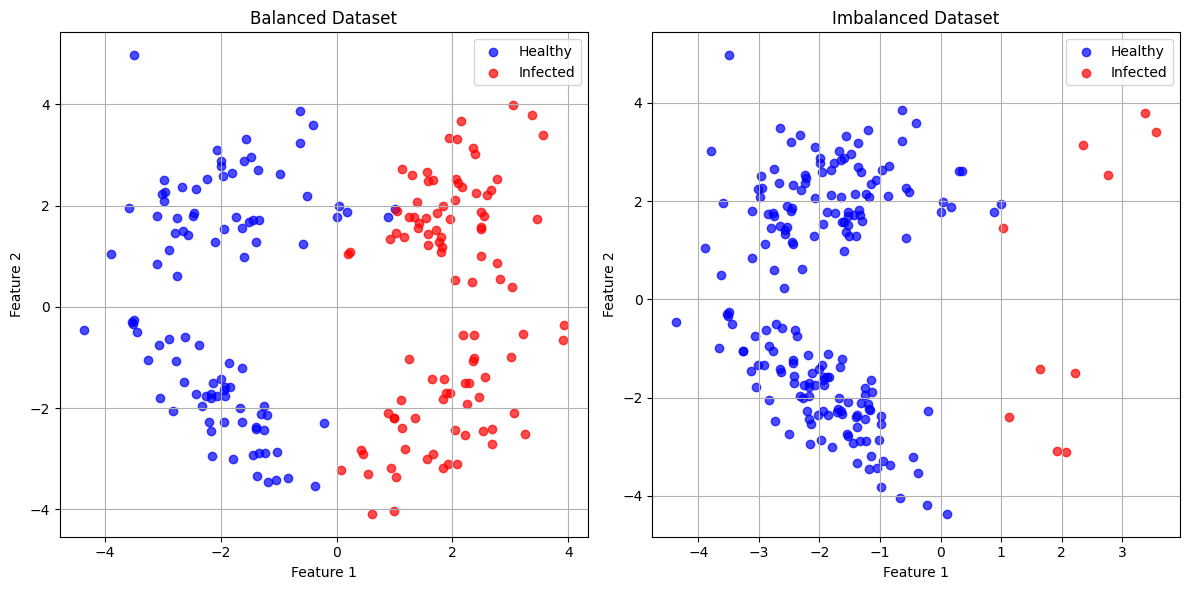

In [61]:

# Set random seed for reproducibility
np.random.seed(42)

# Create a balanced dataset
X_balanced, y_balanced = make_classification(
    n_classes=2,  # Number of classes
    class_sep=2,  # Separation between classes
    weights=[0.5, 0.5],  # Equal class distribution
    n_informative=2,  # Number of informative features
    n_redundant=0,  # No redundant features
    n_features=2,  # Total number of features
    n_samples=200,  # Total samples
    random_state=42
)

# Create an imbalanced dataset
X_imbalanced, y_imbalanced = make_classification(
    n_classes=2,
    class_sep=2,
    weights=[0.95, 0.05],  # Imbalanced class distribution
    n_informative=2,
    n_redundant=0,
    n_features=2,
    n_samples=200,
    random_state=42
)

# Plotting both datasets
plt.figure(figsize=(12, 6))

# Balanced dataset
plt.subplot(1, 2, 1)
plt.scatter(X_balanced[y_balanced == 0][:, 0], X_balanced[y_balanced == 0][:, 1], color='blue', label='Healthy', alpha=0.7)
plt.scatter(X_balanced[y_balanced == 1][:, 0], X_balanced[y_balanced == 1][:, 1], color='red', label='Infected', alpha=0.7)
plt.title('Balanced Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

# Imbalanced dataset
plt.subplot(1, 2, 2)
plt.scatter(X_imbalanced[y_imbalanced == 0][:, 0], X_imbalanced[y_imbalanced == 0][:, 1], color='blue', label='Healthy', alpha=0.7)
plt.scatter(X_imbalanced[y_imbalanced == 1][:, 0], X_imbalanced[y_imbalanced == 1][:, 1], color='red', label='Infected', alpha=0.7)
plt.title('Imbalanced Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

plt.tight_layout() 
plt.show()



C:\Users\sachi\AppData\Local\Temp\ipykernel_21912\2534788896.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\sachi\AppData\Local\Temp\ipykernel_21912\2534788896.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




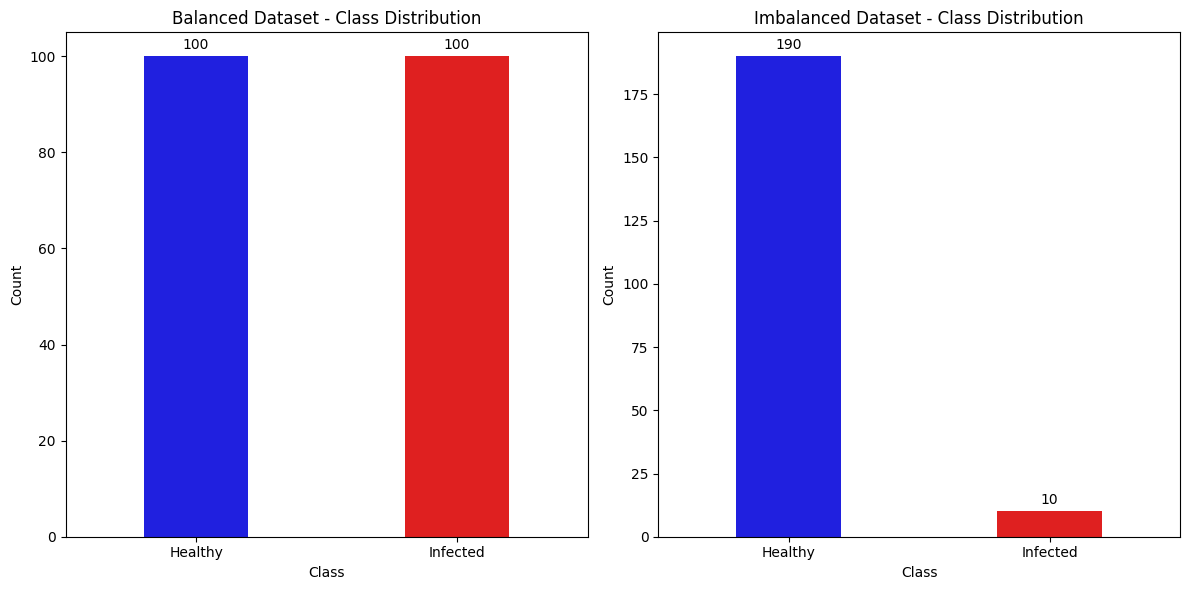

In [76]:
# Plotting histograms for both datasets

import pandas as pd
# Convert to DataFrames for easier plotting
data_balanced = pd.DataFrame({'Class': y_balanced})
data_imbalanced = pd.DataFrame({'Class': y_imbalanced})

# Plotting bar charts for both datasets
plt.figure(figsize=(12, 6))

# Balanced dataset bar chart
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='Class', data=data_balanced, width=0.4, palette={'0': 'blue', '1': 'red'})
ax1.bar_label(ax1.containers[0], fmt='%d', label_type='edge', padding=3)
ax1.bar_label(ax1.containers[1], fmt='%d', label_type='edge', padding=3)
plt.title('Balanced Dataset - Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Healthy', 'Infected'])


# Imbalanced dataset bar chart
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='Class', data=data_imbalanced, width=0.4, palette={'0': 'blue', '1': 'red'})
ax2.bar_label(ax2.containers[0], fmt='%d', label_type='edge', padding=3)
ax2.bar_label(ax2.containers[1], fmt='%d', label_type='edge', padding=3)
plt.title('Imbalanced Dataset - Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Healthy', 'Infected'])




plt.tight_layout()
plt.show()


# 2. Problems with Imbalanced Datasets


Imbalanced datasets pose several challenges to machine learning models. Some of the common problems are:

1. **Bias Towards Majority Class**: <br> 
    * Models trained on imbalanced datasets tend to predict the majority class more frequently than the minority class. 
    * This is because the model's objective is to minimize the overall error, and predicting the majority class helps achieve this goal.

2. **Poor Generalization**: <br> 
    * Models trained on imbalanced datasets may not generalize well to unseen data, especially for the minority class. 
    * This is because the model has not learned the underlying patterns in the minority class due to the lack of sufficient samples.

3. **Misleading Evaluation Metrics**:<br> 
    * Traditional evaluation metrics like accuracy can be misleading on imbalanced datasets. <br>

    For example, a model that predicts the majority class with high accuracy may perform poorly on the minority class, which is often more critical in real-world applications.

and many more.

**Note**<br>
Accuracy never helps in imbalanced dataset. The most common metrics to use for imbalanced datasets are:<br>
* F1 score
* Precision
* AUC-ROC
* Recall


# 3. Techniques to Handle Imbalanced Datasets
There are several techniques to handle imbalanced datasets. This notebook will cover the following methods:
* Random Under-Sampling
* Random Over-Sampling
* SMOTE (Synthetic Minority Over-sampling Technique)

Loading sample dataset from Kaggle: [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud). For dataset description, please refer to the link.

In [62]:
#importing necessary libraries
import pandas as pd 
import plotly.express as px
import seaborn as sns


In [5]:
## Loading the Dataset
data = pd.read_csv('creditcard.csv')

### Exploring the dataset briefly

In [6]:
print(data.shape)

(284807, 31)


In [7]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [9]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

As this notebook is focused on handling imbalanced datasets, we will not go deep into the dataset's features and their significance. We will only explore the class distribution and the target variable. <br>
Also we will drop some columns so that it will be simple to understand the concept of handling imbalanced dataset. Additionally, we can also remove some rows to make the dataset smaller and easier to handle.

In [10]:
# dropping columns from V6 to V28 including Time for simplicity 
columns_to_drop = ['V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Time']
data.drop(columns=columns_to_drop, inplace=True)

In [11]:
data.head() #dataset after dropping columns

,V1,V2,V3,V4,V5,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,69.99,0


In [12]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

#### Note:
**class 0:** Non-fraudulent transactions<br>
**class 1:** Fraudulent transactions

### Pie chart of class distribution

In [13]:
labels = ['Genuine','Fraud']
fraud_or_not = data['Class'].value_counts()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=data['Class'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["green","red"]
             ,title="Genuine vs Fraud transactions")
fig.show()


### Bar plot of target variable

C:\Users\sachi\AppData\Local\Temp\ipykernel_21912\1110052397.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\sachi\AppData\Local\Temp\ipykernel_21912\1110052397.py:14: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



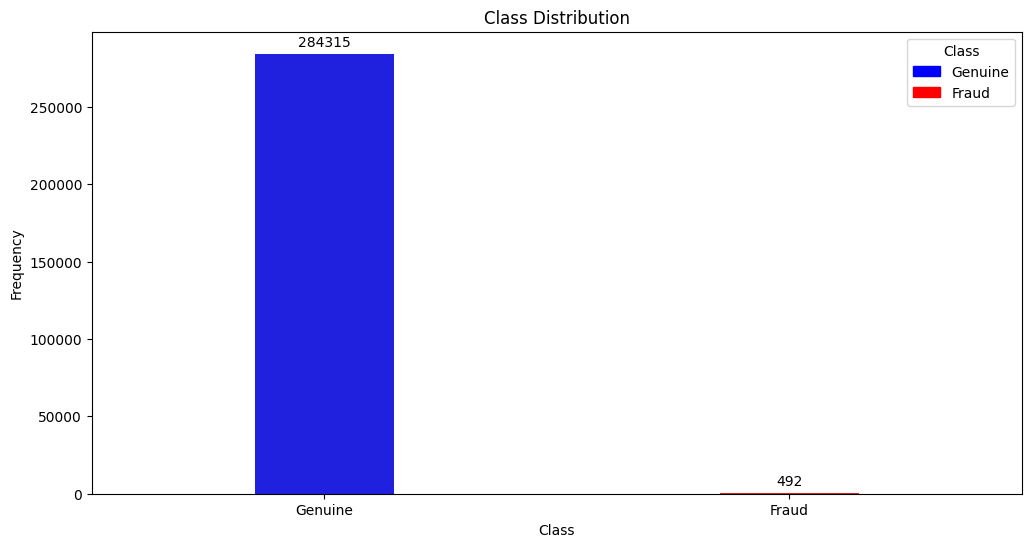

In [25]:
plt.figure(figsize=(12, 6))

# Define custom colors for each class
custom_palette = {'0': 'blue', '1': 'red'}

# Create the countplot with a custom palette
ax = sns.countplot(x='Class', data=data, width=0.3, palette=custom_palette)

# Add annotations on top of each bar
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge', padding=3)
ax.bar_label(ax.containers[1], fmt='%d', label_type='edge', padding=3)

# Update x-axis labels for better readability
ax.set_xticklabels(['Genuine', 'Fraud'])

# Add titles and labels
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')

# Add a legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in custom_palette.values()]
labels = ['Genuine', 'Fraud']
plt.legend(handles, labels, title='Class', loc='upper right')

# Show the plot
plt.show()

From bar plot and pie chart, we can see that the dataset is highly imbalanced, with the majority class (Non-Fraud) accounting for 99.8% of the samples, and the minority class (Fraud) accounting for only 0.17% of the samples. This is a classic example of an imbalanced dataset, and we will use this dataset to demonstrate various techniques to handle imbalanced datasets.

## 3.1 Random Under-Sampling
* Random under-sampling involves randomly removing samples from the majority class to balance the class distribution. <br>
* It includes to get all of the classes to same amount as the minority class.<br>

For example: If the minority class has 100 samples and the majority class has 1000 samples, we can randomly select 100 samples from the majority class to balance the dataset.<br>
This approach may be more efficient when the dataset is large with class imbalanace but there is sufficient number of samples in the minority class.<br>

![Image](under.png) <br>





For undersampling and oversampling we will use `imbalanced-learn` library. It is a python library offering a number of re-sampling techniques commonly used in datasets showing strong between-class imbalance. 

C:\Users\sachi\AppData\Local\Temp\ipykernel_21912\3096912889.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\sachi\AppData\Local\Temp\ipykernel_21912\3096912889.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\sachi\AppData\Local\Temp\ipykernel_21912\3096912889.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\sachi\AppData\Local\Temp\ipykernel_21912\3096912889.py:29: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



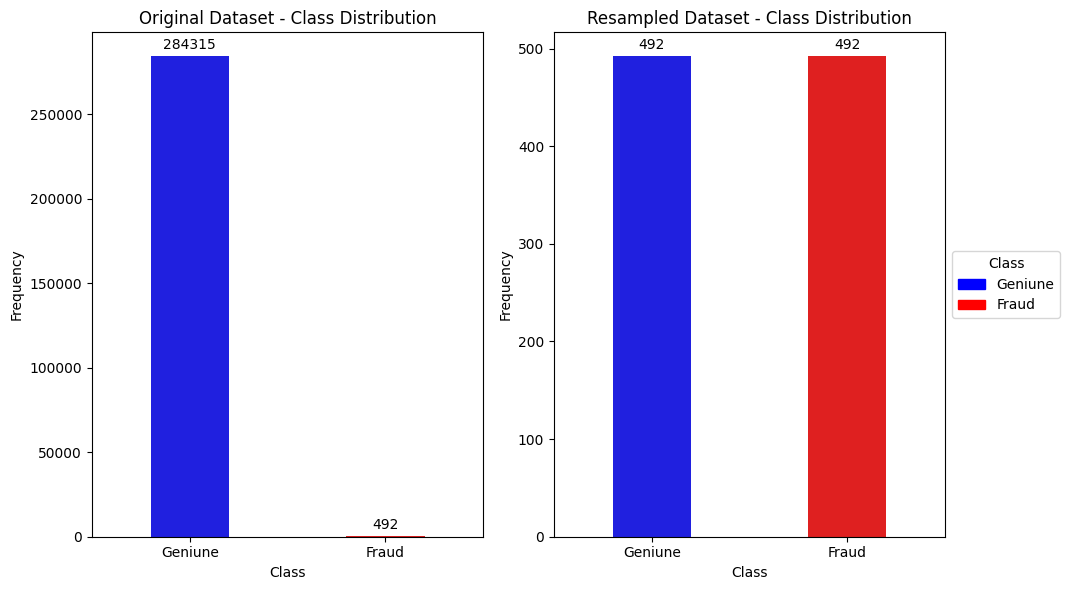

In [78]:
from imblearn.under_sampling import RandomUnderSampler

rand_under = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rand_under.fit_resample(data.drop(columns=['Class']), data['Class'])


custom_palette = {'0': 'blue', '1': 'red'}

plt.figure(figsize=(12, 6))

# Original dataset
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='Class', data=data, width=0.4, palette=custom_palette)
ax1.set_title('Original Dataset - Class Distribution')
ax1.set_xlabel('Class')
ax1.set_ylabel('Frequency')
ax1.set_xticklabels(['Geniune', 'Fraud'])

# Add annotations on top of each bar
ax1.bar_label(ax1.containers[0], fmt='%d', label_type='edge', padding=3)
ax1.bar_label(ax1.containers[1], fmt='%d', label_type='edge', padding=3)

# Resampled dataset
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x=y_resampled, width=0.4, palette=custom_palette)
ax2.set_title('Resampled Dataset - Class Distribution')
ax2.set_xlabel('Class')
ax2.set_ylabel('Frequency')
ax2.set_xticklabels(['Geniune', 'Fraud'])

# Add annotations on top of each bar
ax2.bar_label(ax2.containers[0], fmt='%d', label_type='edge', padding=3)
ax2.bar_label(ax2.containers[1], fmt='%d', label_type='edge', padding=3)


handles = [
    plt.Rectangle((0, 0), 1, 1, color='blue'),  # Blue for original dataset
    plt.Rectangle((0, 0), 1, 1, color='red')   # Red for resampled dataset
]

labels = ['Geniune', 'Fraud']

# handles and labels are used to format the legend properly. Handles is for the color and outline of the legend box, and labels are the text inside the legend box.

# Add a unified legend outside the plot area
plt.legend(handles=handles, labels=labels, title='Class', loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout to avoid overlap and add space for the legend
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Make room on the right for the legend
plt.show()





In [108]:
print(f'Number of samples in the original dataset: {data.shape[0]}')
print(f"Nmber of samples of classes in the original dataset:\n {data['Class'].value_counts()}")
print("--"*50)
print(f'Number of samples in the resampled dataset: {X_resampled.shape[0]}')
print(f"Nmber of samples of classes in the resampled dataset:\n {pd.Series(y_resampled).value_counts()}")

Number of samples in the original dataset: 284807
Nmber of samples of classes in the original dataset:
 Class
0    284315
1       492
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Number of samples in the resampled dataset: 984
Nmber of samples of classes in the resampled dataset:
 Class
0    492
1    492
Name: count, dtype: int64


`fit_resample()` in the above code is the core method used to perform resampling. It takes in two imputs:<br>
* X: The feature of the dataset
* y: The target variable of the dataset <br>

**How it works?**<br>
1. Fitting:<br>
    * Analyzes the class distribution in y (e.g., how many samples exist for each class).
    * Identifies the majority class and determines how many samples to retain (equal to the number of samples in the minority class).
2. Resampling:<br>
    * Randomly selects a subset of samples from the majority class.
    * Combines the minority class samples with the subset of majority class samples to create a balanced dataset.



# 3.2 Random Over-Sampling
Random over-sampling involves randomly duplicating samples from the minority class to balance the class distribution. In previous example, we made the majority class equal to the minority class. In this case, we will make the minority class equal to the majority class.<br>
Random over-sampling may be more efficient when the dataset is small and the class imbalance is severe. However, it may lead to overfitting, as the model sees the same samples multiple times during training.<br>

![Image](over.png) <br>



C:\Users\sachi\AppData\Local\Temp\ipykernel_21912\926687824.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\sachi\AppData\Local\Temp\ipykernel_21912\926687824.py:15: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\sachi\AppData\Local\Temp\ipykernel_21912\926687824.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\sachi\AppData\Local\Temp\ipykernel_21912\926687824.py:28: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



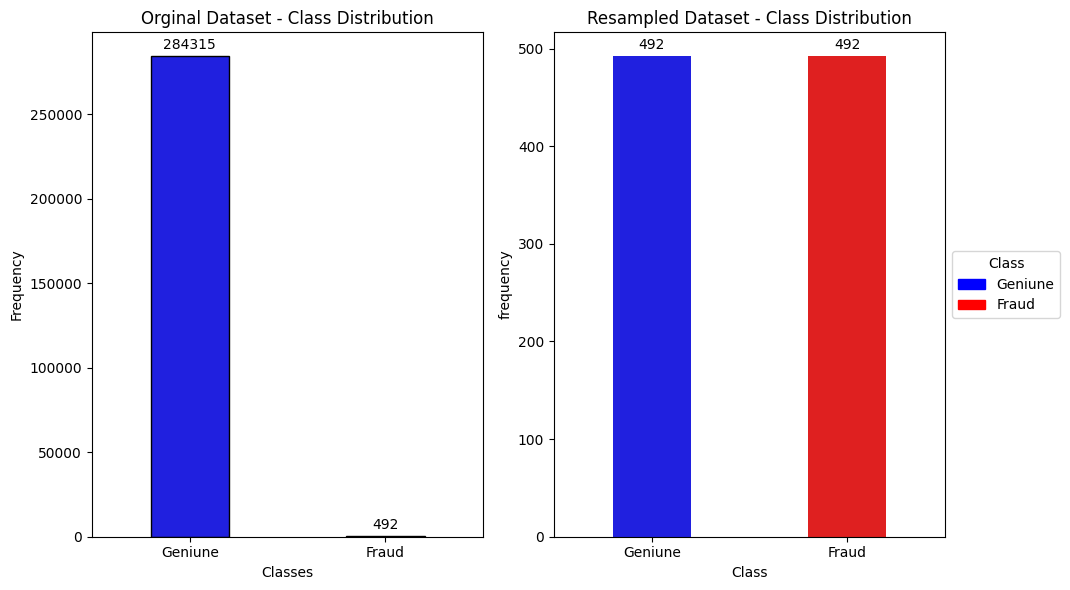

In [ ]:
from imblearn.over_sampling import RandomOverSampler

rand_over = RandomOverSampler(random_state=42)
X_resampled_Over, y_resampled_Over = rand_over.fit_resample(data.drop(columns=['Class']), data['Class'])

custom_palette = {'0':'Blue', '1':'Red'}
plt.figure(figsize=(12,6))

#plotting original dataset
plt.subplot(1,2,1)
ax1 = sns.countplot(x='Class', data=data, width=0.4, epalette=custom_palette)
ax1.set_title('Orginal Dataset - Class Distribution')
ax1.set_xlabel('Class')
ax1.set_ylabel('Frequency')
ax1.set_xticklabels(['Geniune','Fraud'])

#add number on top of each bar
for container in ax1.containers:
    ax1.bar_label(container, fmt="%d", label_type='edge', padding=3)
    

#plotting resampled data
plt.subplot(1,2,2)
ax2 = sns.countplot(x=y_resampled, width=0.4, palette=custom_palette)
ax2.set_title("Resampled Dataset - Class Distribution")
ax2.set_xlabel('Class')
ax2.set_ylabel("frequency")
ax2.set_xticklabels(['Geniune', 'Fraud'])

for container in ax2.containers:
    ax2.bar_label(container, fmt="%d", label_type='edge', padding=3)
    
handles = [
    plt.Rectangle((0,0),1,1, color='blue'),
    plt.Rectangle((0,0),1,1, color='red')
]

labels = ['Geniune', 'Fraud']

plt.legend(handles=handles, labels=labels, title='Class', loc='center left', bbox_to_anchor=(1,0.5))

plt.tight_layout(rect=[0,0,0.9,1])
plt.show()




In [112]:
print(f'Number of samples in the original dataset: {data.shape[0]}')
print(f"Nmber of samples of classes in the original dataset:\n {data['Class'].value_counts()}")
print("--"*50)
print(f'Number of samples in the resampled dataset: {X_resampled_Over.shape[0]}')
print(f"Nmber of samples of classes in the resampled dataset:\n {pd.Series(y_resampled_Over).value_counts()}")

Number of samples in the original dataset: 284807
Nmber of samples of classes in the original dataset:
 Class
0    284315
1       492
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Number of samples in the resampled dataset: 568630
Nmber of samples of classes in the resampled dataset:
 Class
0    284315
1    284315
Name: count, dtype: int64


## 3.3 SMOTE (Synthetic Minority Over-sampling Technique)

In above two methods: <br> 
* we either removed samples from the majority class (under-sampling) 
* Or duplicated samples from the minority class (over-sampling). 

Both methods have their limitations. Under-sampling may lead to loss of information, while over-sampling may lead to overfitting.<br>





**SMOTE** is an oversampling method of balancing class distribution in the dataset. 
* It generates synthetic samples for the minority class by interpolating between existing samples. 
* This helps in creating new samples that are not just duplicates of existing samples but are slightly different. 
* This can help in reducing overfitting and improving the model's generalization.<br>

**Working of SMOTE:**<br>
1. Select a sample from the minority class.
2. Find its k nearest neighbors (usually k=5).
3. Randomly select one of the k neighbors.
4. Generate a new sample by interpolating between the selected sample and the randomly selected neighbor.
5. Repeat the process until the desired number of samples is generated.

![Image](SMOTE.png) <br>
[Image source](https://cdn.analyticsvidhya.com/wp-content/uploads/2024/09/77417image1.webp)

### Mathematical Representation of SMOTE

SMOTE generates synthetic samples for the minority class by interpolating between existing samples. 

**1. Input:** <br>
- $X_m = \{x_1, x_2, \dots, x_n\}$ be the set of minority class samples, where $x_i \in \mathbb{R}^d$. (d is the dimension of the feature space)
- $N$ be the number of synthetic samples to generate.
- $k$ be the number of nearest neighbors to consider.

**2. Steps:**<br>

For each minority class data point $x_i \in X_m$:

1. Find $k$-nearest neighbors $\{x_{i1}, x_{i2}, \dots, x_{ik}\}$ using a distance metric (e.g., Euclidean distance).
2. Randomly select one neighbor $x_{ij}$.
3. Generate a synthetic sample $x_{\text{synthetic}}$ using:<br>
   $$
   x_{\text{synthetic}} = x_i + \lambda \cdot (x_{ij} - x_i),
   $$<br>
   where $\lambda \sim \mathcal{U}(0, 1)$ is a random number between 0 and 1.

This process is repeated $N$ times to create $N$ synthetic samples.



C:\Users\sachi\AppData\Local\Temp\ipykernel_21912\1076490866.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\sachi\AppData\Local\Temp\ipykernel_21912\1076490866.py:16: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\sachi\AppData\Local\Temp\ipykernel_21912\1076490866.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\sachi\AppData\Local\Temp\ipykernel_21912\1076490866.py:28: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



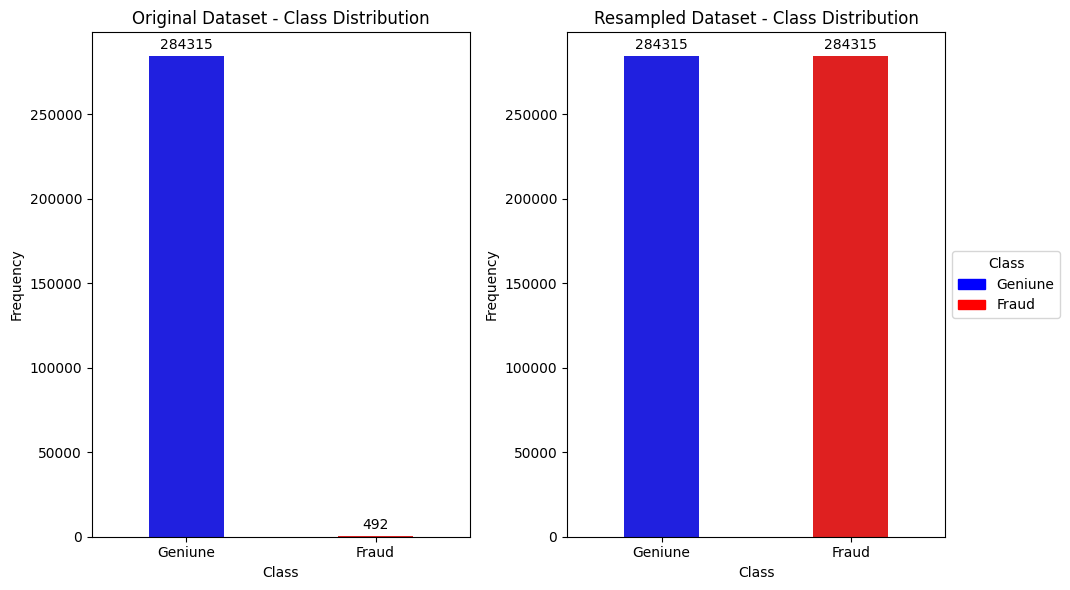

In [60]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled_SMOTE, y_resampled_SMOTE = smote.fit_resample(data.drop(columns=['Class']), data['Class'])

custom_palette = {'0':'Blue', '1':'Red'}

plt.figure(figsize=(12,6))

#plotting original dataset
plt.subplot(1,2,1)
ax1 = sns.countplot(x='Class',data=data, width=0.4, palette=custom_palette)
ax1.set_title('Original Dataset - Class Distribution')
ax1.set_xlabel('Class')
ax1.set_ylabel('Frequency')
ax1.set_xticklabels(['Geniune','Fraud'])

#add number on top of each bar
for container in ax1.containers:
    ax1.bar_label(container, fmt="%d", label_type='edge', padding=3)
    
#plotting resampled data
plt.subplot(1,2,2)
ax2 = sns.countplot(x=y_resampled_SMOTE, width=0.4, palette=custom_palette)
ax2.set_title('Resampled Dataset - Class Distribution')
ax2.set_xlabel('Class')
ax2.set_ylabel('Frequency')
ax2.set_xticklabels(['Geniune','Fraud'])

for container in ax2.containers:
    ax2.bar_label(container, fmt="%d", label_type='edge', padding=3)

handles = [
    plt.Rectangle((0,0),1,1, color='blue'),
    plt.Rectangle((0,0),1,1, color='red')
]

labels = ['Geniune', 'Fraud']

plt.legend(handles=handles, labels=labels, title='Class', loc='center left', bbox_to_anchor=(1,0.5))

plt.tight_layout(rect=[0,0,0.9,1])
plt.show()


In [115]:
print(f'Number of samples in the original dataset: {data.shape[0]}')
print(f"Nmber of samples of classes in the original dataset:\n {data['Class'].value_counts()}")
print("--"*50)
print(f'Number of samples in the resampled dataset: {X_resampled_SMOTE.shape[0]}')
print(f"Nmber of samples of classes in the resampled dataset:\n {pd.Series(y_resampled_SMOTE).value_counts()}")


Number of samples in the original dataset: 284807
Nmber of samples of classes in the original dataset:
 Class
0    284315
1       492
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Number of samples in the resampled dataset: 568630
Nmber of samples of classes in the resampled dataset:
 Class
0    284315
1    284315
Name: count, dtype: int64


# 4. Conclusion

In this notebook, we discussed the challenges posed by imbalanced datasets and explored various techniques to handle them. We used a sample dataset to demonstrate random under-sampling, random over-sampling, and SMOTE. Each technique has its advantages and limitations, and the choice of method depends on the dataset size, class imbalance, and the model's performance. It is essential to experiment with different techniques and evaluate the model's performance using appropriate metrics to determine the best approach for handling imbalanced datasets.<br>
Also note that, these problems that can arise while using data balancing tecniques : <br>
* Overfitting Risk
* Loss of Information
* Increased Computational Cost
* Complexity of Synthetic Data Generation


### Mathematical Expression for SMOTE

SMOTE generates synthetic samples for the minority class by interpolating between existing samples. Let:

- $X_m = \{x_1, x_2, \dots, x_n\}$ be the set of minority class samples, where $x_i \in \mathbb{R}^d$.
- $N$ be the number of synthetic samples to generate.
- $k$ be the number of nearest neighbors to consider.

For each $x_i \in X_m$:

1. Find $k$-nearest neighbors $\{x_{i1}, x_{i2}, \dots, x_{ik}\}$.
2. Randomly select one neighbor $x_{ij}$.
3. Generate a synthetic sample $x_{\text{synthetic}}$ using:
   $
   x_{\text{synthetic}} = x_i + \lambda \cdot (x_{ij} - x_i),
   $
   where $\lambda \sim \mathcal{U}(0, 1)$.

This process is repeated $N$ times to create $N$ synthetic samples.
